In [1]:
import numpy as np
import pandas as pd
import sys, os, time
main_folder = './../'
if main_folder not in sys.path:
    sys.path.append(main_folder)
from evolution import DifferentialEvolution
from glob       import glob
from tqdm       import tqdm

import dirs
from utils      import get_solution, ProgressBar, write_log
import matplotlib.pyplot as plt 

progbar = ProgressBar(elapsed_time=True)

### Parameters

In [2]:
# Competition Parameters
funcId      = 1
dim         = 10
numRuns     = 2
targetError = 1e-8

# Algorithm Parameters
pop_size = 300
percMaxEvals = 1
maxEvals = 'auto'
maxGenerations = None
fitness_clusters = None
crossover = 'binonial'
mutation = 'best'
n_diff = 1
lambda_mutation = .5
opposition = False
input_data_filepath = './../input_data'
active = False

In [3]:
# Parameters
algorithm = "de"
mutation = "best"
n_diff = 1
crossover = "bin"
funcId = 14
dim = 10
numRuns = 51
pop_size = 300
percMaxEvals = 0.3
lambda_mutation = 0.5
opposition = False
fitness_clusters = None
input_data_filepath = "./input_data"
active = True


In [4]:
maxEvals = maxEvals if percMaxEvals is None else percMaxEvals*10000*dim
run_tag = '[' + '_'.join([str(funcId), 
                          str(dim), 
                          str(numRuns),
                          str(pop_size), 
                          str(percMaxEvals),                                                     
                          '{}'.format(lambda_mutation), 
                          str(opposition),
                          str(fitness_clusters)
                         ])  + ']'
run_tag

'[14_10_51_300_0.3_0.5_False_None]'

In [5]:
alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)

output_filepath = os.path.join(dirs.results, str(alg))
if not os.path.exists(output_filepath):
    os.makedirs(output_filepath)
output_filepath = output_filepath + '/' + run_tag

print ('Writing log at ', output_filepath + 'log.tsv')
write_log(filepath=output_filepath + 'log.tsv', 
          mode="w+", 
          text='[{}]\trun\telapsedTime\tsuccessRate\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime())))  

Writing log at 

./results/DE/best/1/bin/[14_10_51_300_0.3_0.5_False_None]log.tsv

In [6]:
hist = pd.DataFrame()
arr_runs = range(numRuns)
solution = get_solution(funcId, dim, input_data_filepath=input_data_filepath)
successRate = 0
for idx_run in arr_runs:
    progbar.update_progress(idx_run/float(len(arr_runs)))
    
    # Differential Evolution
    alg = DifferentialEvolution(dim=dim, func_id=funcId, pop_size=pop_size, crossover=crossover, 
        opposition=opposition, mutation=mutation, lambda_mutation=.5, fitness_clusters=fitness_clusters)
    
    errorHist, fitnessHist = alg.optimize(target=solution, max_f_evals=maxEvals, target_error=targetError, verbose=True)        
    bestError = errorHist.iloc[-1,:].min()
    errorHist["run"] = np.ones(errorHist.shape[0], dtype=int)*idx_run
    hist = pd.concat([hist, errorHist], ignore_index=False)    
    if bestError <= targetError:
        print ("Target error achieved with error {}".format(bestError))
        successRate += 1
    
    write_log(filepath=output_filepath + 'log.tsv', 
              text='[{}]\t{}/{}\t{}\t{}\n'.format(time.strftime("%Y-%m-%d %H:%M:%S", time.gmtime()), 
                                              idx_run+1,
                                              len(arr_runs),
                                              progbar.get_elapsed_time(),
                                              successRate)
             )
    
hist.index.name = 'generation'
hist.to_csv(output_filepath + 'hist.tsv', sep='\t')
progbar.update_progress(1)

[0:00:00][----------] 0.00% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8321

Best Fitness:	1400.3834
Solution:	1400.0000
Diff:		0.3834

[0:03:51][----------] 1.96% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9206

Best Fitness:	1400.2573
Solution:	1400.0000
Diff:		0.2573

[0:07:21][----------] 3.92% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8976

Best Fitness:	1400.2414
Solution:	1400.0000
Diff:		0.2414

[0:10:54][#---------] 5.88% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9659

Best Fitness:	1400.2742
Solution:	1400.0000
Diff:		0.2742

[0:13:54][#---------] 7.84% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9279

Best Fitness:	1400.2984
Solution:	1400.0000
Diff:		0.2984

[0:17:16][#---------] 9.80% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9102

Best Fitness:	1400.2555
Solution:	1400.0000
Diff:		0.2555

[0:20:34][#---------] 11.76% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9035

Best Fitness:	1400.2333
Solution:	1400.0000
Diff:		0.2333

[0:23:34][#---------] 13.73% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9285

Best Fitness:	1400.2395
Solution:	1400.0000
Diff:		0.2395

[0:26:42][##--------] 15.69% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9938

Best Fitness:	1400.1502
Solution:	1400.0000
Diff:		0.1502

[0:29:59][##--------] 17.65% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1401.0097

Best Fitness:	1400.2229
Solution:	1400.0000
Diff:		0.2229

[0:32:55][##--------] 19.61% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9172

Best Fitness:	1400.1221
Solution:	1400.0000
Diff:		0.1221

[0:36:14][##--------] 21.57% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9451

Best Fitness:	1400.2221
Solution:	1400.0000
Diff:		0.2221

[0:39:09][##--------] 23.53% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9203

Best Fitness:	1400.2243
Solution:	1400.0000
Diff:		0.2243

[0:41:47][###-------] 25.49% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9620

Best Fitness:	1400.2437
Solution:	1400.0000
Diff:		0.2437

[0:44:43][###-------] 27.45% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9705

Best Fitness:	1400.2802
Solution:	1400.0000
Diff:		0.2802

[0:47:21][###-------] 29.41% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9175

Best Fitness:	1400.2035
Solution:	1400.0000
Diff:		0.2035

[0:50:02][###-------] 31.37% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9332

Best Fitness:	1400.2099
Solution:	1400.0000
Diff:		0.2099

[0:52:43][###-------] 33.33% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9020

Best Fitness:	1400.1671
Solution:	1400.0000
Diff:		0.1671

[0:55:36][####------] 35.29% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9871

Best Fitness:	1400.1858
Solution:	1400.0000
Diff:		0.1858

[0:58:25][####------] 37.25% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9666

Best Fitness:	1400.2191
Solution:	1400.0000
Diff:		0.2191

[1:01:06][####------] 39.22% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9249

Best Fitness:	1400.2105
Solution:	1400.0000
Diff:		0.2105

[1:03:55][####------] 41.18% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8984

Best Fitness:	1400.2441
Solution:	1400.0000
Diff:		0.2441

[1:06:46][####------] 43.14% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9619

Best Fitness:	1400.2474
Solution:	1400.0000
Diff:		0.2474

[1:09:18][#####-----] 45.10% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8887

Best Fitness:	1400.1712
Solution:	1400.0000
Diff:		0.1712

[1:12:23][#####-----] 47.06% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9384

Best Fitness:	1400.2494
Solution:	1400.0000
Diff:		0.2494

[1:15:20][#####-----] 49.02% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9869

Best Fitness:	1400.2336
Solution:	1400.0000
Diff:		0.2336

[1:17:57][#####-----] 50.98% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8885

Best Fitness:	1400.2259
Solution:	1400.0000
Diff:		0.2259

[1:20:59][#####-----] 52.94% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9255

Best Fitness:	1400.2586
Solution:	1400.0000
Diff:		0.2586

[1:23:31][#####-----] 54.90% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9924

Best Fitness:	1400.2254
Solution:	1400.0000
Diff:		0.2254

[1:26:18][######----] 56.86% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9485

Best Fitness:	1400.1306
Solution:	1400.0000
Diff:		0.1306

[1:28:52][######----] 58.82% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9329

Best Fitness:	1400.1696
Solution:	1400.0000
Diff:		0.1696

[1:31:36][######----] 60.78% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9195

Best Fitness:	1400.1701
Solution:	1400.0000
Diff:		0.1701

[1:34:00][######----] 62.75% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9007

Best Fitness:	1400.1939
Solution:	1400.0000
Diff:		0.1939

[1:36:21][######----] 64.71% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9662

Best Fitness:	1400.2682
Solution:	1400.0000
Diff:		0.2682

[1:38:55][#######---] 66.67% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9438

Best Fitness:	1400.2690
Solution:	1400.0000
Diff:		0.2690

[1:41:25][#######---] 68.63% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9345

Best Fitness:	1400.2540
Solution:	1400.0000
Diff:		0.2540

[1:43:43][#######---] 70.59% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9421

Best Fitness:	1400.1908
Solution:	1400.0000
Diff:		0.1908

[1:46:23][#######---] 72.55% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9566

Best Fitness:	1400.2141
Solution:	1400.0000
Diff:		0.2141

[1:48:52][#######---] 74.51% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9146

Best Fitness:	1400.1618
Solution:	1400.0000
Diff:		0.1618

[1:51:25][########--] 76.47% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9588

Best Fitness:	1400.2760
Solution:	1400.0000
Diff:		0.2760

[1:53:50][########--] 78.43% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9624

Best Fitness:	1400.1773
Solution:	1400.0000
Diff:		0.1773

[1:56:15][########--] 80.39% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9593

Best Fitness:	1400.2792
Solution:	1400.0000
Diff:		0.2792

[1:58:47][########--] 82.35% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9156

Best Fitness:	1400.3392
Solution:	1400.0000
Diff:		0.3392

[2:01:19][########--] 84.31% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9338

Best Fitness:	1400.3036
Solution:	1400.0000
Diff:		0.3036

[2:03:39][#########-] 86.27% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8821

Best Fitness:	1400.2938
Solution:	1400.0000
Diff:		0.2938

[2:06:03][#########-] 88.24% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9086

Best Fitness:	1400.2496
Solution:	1400.0000
Diff:		0.2496

[2:08:28][#########-] 90.20% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.8671

Best Fitness:	1400.2465
Solution:	1400.0000
Diff:		0.2465

[2:10:54][#########-] 92.16% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9654

Best Fitness:	1400.1882
Solution:	1400.0000
Diff:		0.1882

[2:13:24][#########-] 94.12% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9608

Best Fitness:	1400.1649
Solution:	1400.0000
Diff:		0.1649

[2:15:52][##########] 96.08% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9586

Best Fitness:	1400.2080
Solution:	1400.0000
Diff:		0.2080

[2:18:09][##########] 98.04% 

Optimization ended due to max fitness evals (max = 30000.0, curr = 30000)


#Generations:	98

#FitnessEvals:	30000

Mean Fitness:	1400.9810

Best Fitness:	1400.1715
Solution:	1400.0000
Diff:		0.1715

[2:20:42][##########] 100.00% Done...


In [7]:
print ("Elapsed Time: ", progbar.get_elapsed_time())

Elapsed Time: 

2:20:42

In [8]:
errorHist.tail()

,0,1,2,3,4,5,6,7,8,9,...,291,292,293,294,295,296,297,298,299,run
generation,,,,,,,,,,,,,,,,,,,,,
93,0.517698,1.065916,0.379054,0.64351,0.926214,1.453632,0.906008,0.583506,0.750033,1.100015,...,0.780566,1.826255,1.249678,1.156956,1.156586,0.661375,1.053317,0.544916,0.876402,50
94,0.517698,1.065916,0.379054,0.64351,0.926214,1.453632,0.906008,0.583506,0.750033,1.100015,...,0.780566,1.826255,1.249678,1.156956,1.156586,0.661375,1.053317,0.544916,0.876402,50
95,0.517698,1.065916,0.379054,0.64351,0.926214,1.453632,0.906008,0.583506,0.750033,1.100015,...,0.780566,1.826255,1.249678,1.156956,1.156586,0.661375,1.053317,0.544916,0.876402,50
96,0.517698,1.065916,0.379054,0.64351,0.926214,1.453632,0.906008,0.583506,0.750033,1.100015,...,0.780566,1.826255,1.249678,1.156956,1.156586,0.661375,1.053317,0.544916,0.876402,50
97,0.517698,1.065916,0.379054,0.64351,0.926214,1.453632,0.906008,0.583506,0.750033,1.100015,...,0.780566,1.826255,1.249678,1.156956,1.156586,0.661375,1.053317,0.544916,0.876402,50


In [9]:
arr_error = list()
arr_best_error = list()
for run in hist['run'].unique():
    df_run = hist[hist['run'] == run].drop(['run'], axis=1) 
    bestError = df_run.iloc[-1,:].min()    
    arr_best_error.append(bestError)    
    print ('Best error for run {}: {}'.format(run, bestError))
    arr_error.append(np.array(df_run.min(axis=1)))    
arr_error = np.array(arr_error)
# arr_error

Best error for run 0: 0.3833847708417579

Best error for run 1: 0.2572566161627492

Best error for run 2: 0.24143704257699028

Best error for run 3: 0.2742456207702162

Best error for run 4: 0.29836100456327586

Best error for run 5: 0.2555187220618791

Best error for run 6: 0.23334056838916695

Best error for run 7: 0.2395392156156504

Best error for run 8: 0.15024476344797222

Best error for run 9: 0.22290207567789366

Best error for run 10: 0.122144686790989

Best error for run 11: 0.2221359816178392

Best error for run 12: 0.2242653466748834

Best error for run 13: 0.24369803007380142

Best error for run 14: 0.2802437276702676

Best error for run 15: 0.2035399158319251

Best error for run 16: 0.2098984267479409

Best error for run 17: 0.16711005958882197

Best error for run 18: 0.18576022853517316

Best error for run 19: 0.21908716454186106

Best error for run 20: 0.21046735085701584

Best error for run 21: 0.24409393368000565

Best error for run 22: 0.24736737490229643

Best error for run 23: 0.17116736505772678

Best error for run 24: 0.24935783884575358

Best error for run 25: 0.23364447996937088

Best error for run 26: 0.22593844640687166

Best error for run 27: 0.2586490202568257

Best error for run 28: 0.22542335810521763

Best error for run 29: 0.13055776698593036

Best error for run 30: 0.16964189232339777

Best error for run 31: 0.17012155671000073

Best error for run 32: 0.19385476147840563

Best error for run 33: 0.2681630654142282

Best error for run 34: 0.2690059917058534

Best error for run 35: 0.25398955425112035

Best error for run 36: 0.19081863756082384

Best error for run 37: 0.21411599879684218

Best error for run 38: 0.1617785841328896

Best error for run 39: 0.2760326742900361

Best error for run 40: 0.177307654724018

Best error for run 41: 0.2791572441815333

Best error for run 42: 0.33921260970691947

Best error for run 43: 0.30355444829638145

Best error for run 44: 0.29375002335382305

Best error for run 45: 0.24958415084211083

Best error for run 46: 0.2465321592133023

Best error for run 47: 0.188170832470405

Best error for run 48: 0.16490491911554273

Best error for run 49: 0.20804824706237923

Best error for run 50: 0.1714925768753801

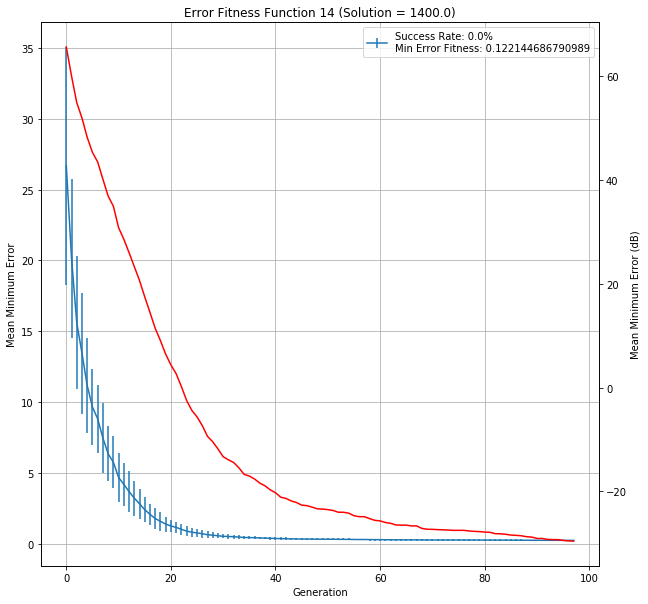

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,10))
label = 'Success Rate: {}%\nMin Error Fitness: {}'.format(100*(successRate/float(numRuns)), arr_error.min())
ax.errorbar(np.arange(alg.generations), arr_error.mean(axis=0), yerr=arr_error.std(axis=0), label=label)
ax2 = ax.twinx()
ax2.plot(np.arange(alg.generations), 20*np.log(arr_error.mean(axis=0)), label='Mean Min Error (dB)', color='red')
ax2.set_ylabel('Mean Minimum Error (dB)')

ax.grid(True)
ax.set_ylabel('Mean Minimum Error')
ax.legend()
ax.set_xlabel('Generation')
ax.set_title('Error Fitness Function {} (Solution = {})'.format(funcId, solution))
plt.savefig(output_filepath + 'mean_error_evolution.jpeg', bbox_inches = 'tight')

In [11]:
df_sumup = pd.DataFrame(columns=['algorithm', '#Fc', 'D', 'percFES'] + ['run_' + str(i) for i in np.arange(1,numRuns+1,1)] + ['mean', 'elapsed_time', 'evals'])
df_sumup.loc[df_sumup.shape[0]] = [str(alg), funcId, dim, percMaxEvals] + arr_best_error + [np.mean(arr_best_error), progbar.get_elapsed_time(), alg.fitnessEvals]
print ('Saving df_sumup to ', output_filepath + 'df_sumup.tsv')
df_sumup.to_csv(output_filepath + 'df_sumup.tsv', sep='\t')
df_sumup

Saving df_sumup to 

./results/DE/best/1/bin/[14_10_51_300_0.3_0.5_False_None]df_sumup.tsv

,algorithm,#Fc,D,percFES,run_1,run_2,run_3,run_4,run_5,run_6,...,run_45,run_46,run_47,run_48,run_49,run_50,run_51,mean,elapsed_time,evals
0,DE/best/1/bin,14,10,0.3,0.383385,0.257257,0.241437,0.274246,0.298361,0.255519,...,0.29375,0.249584,0.246532,0.188171,0.164905,0.208048,0.171493,0.227843,2:20:42,30000
